In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
dataset = pd.read_csv("7419_Assignment2 (letter_recognition).data", sep = ",")

In [3]:
X = dataset.iloc[:, 1 : 17]
Y = dataset.select_dtypes(include = [object])

In [4]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size = 0.20, random_state = 10)

In [5]:
scaler = StandardScaler()
scaler.fit(X_train)


StandardScaler()

In [6]:
X_train = scaler.transform(X_train)
X_validation = scaler.transform(X_validation)

In [7]:
mlp = MLPClassifier(hidden_layer_sizes = (250, 300), max_iter = 1000000, activation = 'logistic')

c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


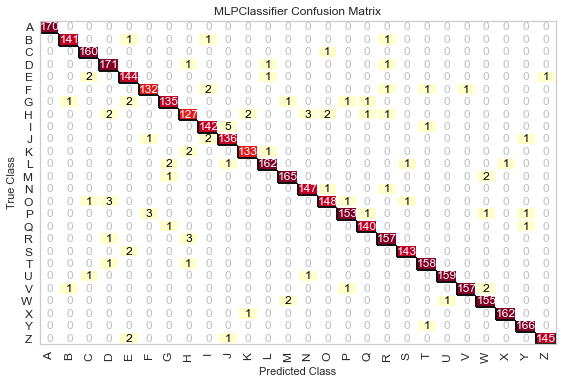

In [8]:
from yellowbrick.classifier import confusion_matrix
cm = confusion_matrix(mlp,X_train,Y_train, X_validation, Y_validation, classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(','))

In [9]:
cm.fit(X_train, Y_train.values.ravel())

ConfusionMatrix(ax=<AxesSubplot:title={'center':'MLPClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                classes=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
                         'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
                         'W', 'X', 'Y', 'Z'],
                cmap=<matplotlib.colors.ListedColormap object at 0x0000028A7FB3DDC0>,
                estimator=MLPClassifier(activation='logistic',
                                        hidden_layer_sizes=(250, 300),
                                        max_iter=1000000))

In [10]:
cm.score(X_validation, Y_validation)

c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.977

In [11]:
predictions = cm.predict(X_validation)
predictions

array(['C', 'I', 'D', ..., 'R', 'B', 'W'], dtype='<U1')

In [12]:
print("Accuracy: ", accuracy_score(Y_validation, predictions))

Accuracy:  0.977
